In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
os.listdir('../../data/math')

['36423-0001-Data.tsv', '36423-0002-Data.tsv']

In [3]:
school_survey = pd.read_csv('../../data/math/36423-0001-Data.tsv',sep='\t')
student_survey = pd.read_csv('../../data/math/36423-0002-Data.tsv',sep='\t')
school_survey.shape, student_survey.shape

((944, 687), (23503, 6608))

In [4]:
features = ["X1TXMSCR", "X1RACE", "X1MTHID", "X1MTHEFF", "X1MTHINT", "X1FAMINCOME", "X1HHNUMBER", "X1P1RELATION", "X1PAR1EMP", "X1PARRESP", "X1SCHOOLBEL", "X1STU30OCC2", "S1M8GRADE", "S1LANG1ST", "S1TEPOPULAR", "S1TEMAKEFUN", "S1MTHCOMP", "S1SCICOMP", "S1APCALC", "S1IBCALC", "S1MTCHVALUES", "S1MTCHINTRST", "S1MTCHFAIR", "S1MTCHRESPCT", "S1MTCHCONF", "S1MTCHEASY", "X1PAR1EDU", "X1PAR2EDU", "X1PAR1OCC2", "X1PAR2OCC2", "P1REPEATGRD", "P1ELLEVER", "P1MARSTAT", "P1YRBORN1", "P1YRBORN2", "P1JOBNOW1", "P1JOBONET1_STEM1", "P1JOBONET2_STEM1", "P1HHTIME", "P1EDUASPIRE", "P1EDUEXPECT", "P1MTHHWEFF", "P1SCIHWEFF", "P1ENGHWEFF", "P1MTHCOMP", "P1SCICOMP", "P1ENGCOMP", "P1MUSEUM", "P1COMPUTER", "P1FIXED", "P1SCIFAIR", "P1SCIPROJ", "P1STEMDISC", "P1NOACT", "P1CAMPMS", "P1CAMPOTH", "P1NOOUTSCH"]
len(features)

57

```
HSLS dataset. We dropped rows that have more than half of the features missing. After dropping these rows, we performed
45 k-NN imputation for missing values. Then, we standardized all of the variables to have values between 0 and 1.
```

In [5]:
data = student_survey[features]
data.describe()

,X1TXMSCR,X1RACE,X1MTHID,X1MTHEFF,X1MTHINT,X1FAMINCOME,X1HHNUMBER,X1P1RELATION,X1PAR1EMP,X1PARRESP,X1SCHOOLBEL,X1STU30OCC2,S1M8GRADE,S1LANG1ST,S1TEPOPULAR,S1TEMAKEFUN,S1MTHCOMP,S1SCICOMP,S1APCALC,S1IBCALC,S1MTCHVALUES,S1MTCHINTRST,S1MTCHFAIR,S1MTCHRESPCT,S1MTCHCONF,S1MTCHEASY,X1PAR1EDU,X1PAR2EDU,X1PAR1OCC2,X1PAR2OCC2,P1REPEATGRD,P1ELLEVER,P1MARSTAT,P1YRBORN1,P1YRBORN2,P1JOBNOW1,P1JOBONET1_STEM1,P1JOBONET2_STEM1,P1HHTIME,P1EDUASPIRE,P1EDUEXPECT,P1MTHHWEFF,P1SCIHWEFF,P1ENGHWEFF,P1MTHCOMP,P1SCICOMP,P1ENGCOMP,P1MUSEUM,P1COMPUTER,P1FIXED,P1SCIFAIR,P1SCIPROJ,P1STEMDISC,P1NOACT,P1CAMPMS,P1CAMPOTH,P1NOOUTSCH
count,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000
mean,35.964517,5.531209,-0.775739,-1.515598,-1.660666,1.009531,0.824320,-0.958218,0.033272,-1.573757,-0.930774,43.048462,0.939455,0.540569,1.868868,1.872655,1.631536,1.670212,1.048675,1.329915,0.042633,0.334893,-0.042718,-0.072459,-0.149300,0.202059,-0.146790,-1.710462,19.168106,14.469132,-2.586436,-1.383951,-1.402715,1326.117219,1039.858401,-2.084798,-2.189380,-3.363103,-1.918181,2.841765,2.188274,-1.415351,-1.570736,-1.679700,-1.028975,-1.085521,-1.564864,-2.447645,-2.232906,-2.501510,-2.683232,-2.540484,-2.364847,-2.785432,-2.802110,-2.654512,-2.746968
std,17.791104,3.759044,2.625987,3.237070,3.354718,6.268507,5.722543,4.997076,5.159337,4.064631,2.875348,35.996877,3.277774,2.818127,3.685017,3.737321,3.729339,3.782795,3.689416,4.073112,3.807676,4.008931,3.821885,3.748688,3.748764,3.930668,5.103464,5.389622,21.270179,23.235530,3.878715,4.742700,4.426468,923.561255,984.072936,4.132043,4.142205,4.175014,4.374079,7.976202,7.608053,4.811188,4.705524,4.622747,5.583414,5.543141,5.187026,4.155042,4.299332,4.116298,3.977431,4.087593,4.212559,3.893435,3.918097,4.037885,3.963916
min,-8.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-8.000000,-9.000000,-8.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,27.822350,4.000000,-1.130000,-1.410000,-1.810000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-0.880000,23.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000
50%,39.029100,8.000000,0.000000,-0.170000,-0.240000,3.000000,4.000000,1.000000,3.000000,1.000000,-0.120000,29.000000,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,23.000000,11.000000,0.000000,2.000000,1.000000,1961.000000,1953.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,1.000000,1.000000,1.000000,3.000000,3.0

In [14]:
(data.corr()['X1RACE'].sort_values(ascending=False))
correlated_with_race = ['X1RACE']

X1RACE              1.000000
S1M8GRADE           0.540126
S1TEPOPULAR         0.537855
X1MTHID             0.537574
S1LANG1ST           0.534319
S1TEMAKEFUN         0.528003
S1MTHCOMP           0.525489
S1SCICOMP           0.520518
S1APCALC            0.508764
X1TXMSCR            0.507847
X1SCHOOLBEL         0.499391
S1IBCALC            0.475715
S1MTCHRESPCT        0.448996
S1MTCHVALUES        0.448706
S1MTCHEASY          0.445143
S1MTCHCONF          0.444516
S1MTCHINTRST        0.444061
S1MTCHFAIR          0.442268
X1MTHEFF            0.413442
X1MTHINT            0.388741
X1PAR1EMP           0.342205
X1FAMINCOME         0.340507
X1PARRESP           0.340506
X1PAR1EDU           0.334134
X1HHNUMBER          0.329872
P1JOBONET1_STEM1    0.322636
P1YRBORN1           0.320094
P1JOBNOW1           0.318072
P1MTHHWEFF          0.316956
P1MARSTAT           0.315269
P1ELLEVER           0.312106
P1REPEATGRD         0.311192
P1SCIHWEFF          0.309626
P1HHTIME            0.306664
P1COMPUTER    

In [208]:
# RACE_MAP = {
#     8: 'WHITE',
#     3: 'BLACK',
#     4: 'HISPANIC',
#     5: 'HISPANIC',
#     2: 'ASIAN',
#     6: 'MULTIRACIAL',
#     7: 'OTHER',
#     1: 'NATIVE',
#     -9: 'UNKNOWN',
# }
# data['RACE'] = data['X1RACE'].map(RACE_MAP)
# data['X1TXMSCR'] = np.where(data['X1TXMSCR'] < -7, None, data['X1TXMSCR'])  #math score
# data['X1MTHID'] = np.where(data['X1MTHID'] <= -6, None, data['X1MTHID'])
# data['X1MTHEFF'] = np.where(data['X1MTHEFF'] <= -6, None, data['X1MTHEFF'])
# data['X1MTHINT'] = np.where(data['X1MTHINT'] <= -6, None, data['X1MTHINT'])
# data['X1FAMINCOME'] = np.where(data['X1FAMINCOME'] < -6, None, data['X1FAMINCOME'])
# data['X1HHNUMBER'] = np.where(data['X1HHNUMBER'] < -6, None, data['X1HHNUMBER'])
# data['X1P1RELATION'] = np.where(data['X1P1RELATION'] < -6, None, data['X1P1RELATION'])
# data['X1PAR1EMP'] = np.where(data['X1PAR1EMP'] < -6, None, data['X1PAR1EMP'])
# data['X1PARRESP'] = np.where(data['X1PARRESP'] < -6, None, data['X1PARRESP'])
# data['X1SCHOOLBEL'] = np.where(data['X1SCHOOLBEL'] < -7, None, data['X1SCHOOLBEL'])
# data['X1STU30OCC2'] = np.where(data['X1STU30OCC2'] < -7, None, data['X1STU30OCC2'])
# data['S1M8GRADE'] = np.where(data['S1M8GRADE'] < -6, None, data['S1M8GRADE'])
# data['S1LANG1ST'] = np.where(data['S1LANG1ST'] < -7, None, data['S1M8GRADE'])
# data['S1TEPOPULAR'] = np.where(data['S1TEPOPULAR'] < -7, None, data['S1TEPOPULAR'])
# data['S1TEMAKEFUN'] = np.where(data['S1TEMAKEFUN'] < -7, None, data['S1TEMAKEFUN'])
# data['S1MTHCOMP'] = np.where(data['S1MTHCOMP'] < -7, None, data['S1MTHCOMP'])
# data['S1SCICOMP'] = np.where(data['S1SCICOMP'] < -7, None, data['S1SCICOMP'])
# data['S1APCALC'] = np.where(data['S1APCALC'] < -6, None, data['S1APCALC'])
# data['S1IBCALC'] = np.where(data['S1IBCALC'] < -6, None, data['S1IBCALC'])
# data['S1MTCHVALUES'] = np.where(data['S1MTCHVALUES'] < -6, None, data['S1MTCHVALUES'])
# data['S1MTCHINTRST'] = np.where(data['S1MTCHINTRST'] < -6, None, data['S1MTCHINTRST'])
# data['S1MTCHFAIR'] = np.where(data['S1MTCHFAIR'] < -6, None, data['S1MTCHFAIR'])
# data['S1MTCHRESPCT'] = np.where(data['S1MTCHRESPCT'] < -6, None, data['S1MTCHRESPCT'])
# data['S1MTCHCONF'] = np.where(data['S1MTCHCONF'] < -6, None, data['S1MTCHCONF'])
# data['S1MTCHEASY'] = np.where(data['S1MTCHEASY'] < -6, None, data['S1MTCHEASY'])
# data['X1PAR1EDU'] = np.where(data['X1PAR1EDU'] < -6, None, data['X1PAR1EDU'])
# data['X1PAR2EDU'] = np.where(data['X1PAR2EDU'] < -6, None, data['X1PAR2EDU'])
# data['X1PAR1OCC2'] = np.where(data['X1PAR1OCC2'] < -6, None, data['X1PAR1OCC2'])
# data['X1PAR2OCC2'] = np.where(data['X1PAR2OCC2'] < -6, None, data['X1PAR2OCC2'])
# data['P1REPEATGRD'] = np.where(data['P1REPEATGRD'] < -7, None, data['P1REPEATGRD'])
# data['P1ELLEVER'] = np.where(data['P1ELLEVER'] < -7, None, data['P1ELLEVER'])
# data['P1MARSTAT'] = np.where(data['P1MARSTAT'] < -7, None, data['P1MARSTAT'])
# data['P1YRBORN1'] = np.where(data['P1YRBORN1'] < -6, None, data['P1YRBORN1'])
# data['P1YRBORN2'] = np.where(data['P1YRBORN2'] < -6, None, data['P1YRBORN2'])
# data['P1JOBNOW1'] = np.where(data['P1JOBNOW1'] < -7, None, data['P1JOBNOW1'])
# data['P1JOBONET1_STEM1'] = np.where(data['P1JOBONET1_STEM1'] < -6, None, data['P1JOBONET1_STEM1'])
# data['P1JOBONET2_STEM1'] = np.where(data['P1JOBONET2_STEM1'] < -6, None, data['P1JOBONET2_STEM1'])
# data['P1HHTIME'] = np.where(data['P1HHTIME'] < -7, None, data['P1HHTIME'])
# data['P1EDUASPIRE'] = np.where(data['P1EDUASPIRE'] < -7, None, data['P1EDUASPIRE'])
# data['P1EDUEXPECT'] = np.where(data['P1EDUEXPECT'] < -7, None, data['P1EDUEXPECT'])
# data['P1MTHHWEFF'] = np.where(data['P1MTHHWEFF'] < -7, None, data['P1MTHHWEFF'])
# data['P1SCIHWEFF'] = np.where(data['P1SCIHWEFF'] < -7, None, data['P1SCIHWEFF'])
# data['P1ENGHWEFF'] = np.where(data['P1ENGHWEFF'] < -7, None, data['P1ENGHWEFF'])
# data['P1MTHCOMP'] = np.where(data['P1MTHCOMP'] < -7, None, data['P1MTHCOMP'])
# data['P1SCICOMP'] = np.where(data['P1SCICOMP'] < -7, None, data['P1SCICOMP'])
# data['P1ENGCOMP'] = np.where(data['P1ENGCOMP'] < -7, None, data['P1ENGCOMP'])
# data['P1MUSEUM'] = np.where(data['P1MUSEUM'] < -7, None, data['P1MUSEUM'])
# data['P1COMPUTER'] = np.where(data['P1COMPUTER'] < -7, None, data['P1COMPUTER'])
# data['P1FIXED'] = np.where(data['P1FIXED'] < -7, None, data['P1FIXED'])
# data['P1SCIFAIR'] = np.where(data['P1SCIFAIR'] < -7, None, data['P1SCIFAIR'])
# data['P1SCIPROJ'] = np.where(data['P1SCIPROJ'] < -7, None, data['P1SCIPROJ'])
# data['P1STEMDISC'] = np.where(data['P1STEMDISC'] < -7, None, data['P1STEMDISC'])
# data['P1NOACT'] = np.where(data['P1NOACT'] < -7, None, data['P1NOACT'])
# data['P1CAMPMS'] = np.where(data['P1CAMPMS'] < -7, None, data['P1CAMPMS'])
# data['P1CAMPOTH'] = np.where(data['P1CAMPOTH'] < -7, None, data['P1CAMPOTH'])
# data['P1NOOUTSCH'] = np.where(data['P1NOOUTSCH'] < -7, None, data['P1NOOUTSCH'])

23503

In [367]:
data = student_survey[features]
RACE_GROUP_MAP = {
    8: 'WHITE_ASIAN',
    3: 'BLACK_HISPANIC_NATIVE',
    4: 'BLACK_HISPANIC_NATIVE',
    5: 'BLACK_HISPANIC_NATIVE',
    2: 'WHITE_ASIAN',
    6: 'MULTIRACIAL_OTHER',
    7: 'MULTIRACIAL_OTHER',
    1: 'BLACK_HISPANIC_NATIVE',
    -9: 'UNKNOWN',
}
data['RACE_GROUP'] = data['X1RACE'].map(RACE_GROUP_MAP)
data = data[data['RACE_GROUP'].isin(['WHITE_ASIAN', 'BLACK_HISPANIC_NATIVE'])]
for column_name in features:
    data[column_name] = np.where(data[column_name] < -6, None, data[column_name])
cont_features = ["X1MTHID", "X1MTHEFF", "X1MTHINT", "X1FAMINCOME", "X1HHNUMBER", "X1SCHOOLBEL", "X1TXMSCR"]
cat_features = data.columns[~data.columns.isin(cont_features)]
data[cont_features] = data[cont_features].astype(np.float64)
# data[cat_features] = data[cat_features].astype('category')
data = data.dropna(subset=['X1TXMSCR'])  # target is unknown
data.shape

(19422, 58)

In [369]:
data_na_dropped = data[data.isna().sum(axis=1) < len(data.columns)/2]
data_na_dropped.shape

(14773, 58)

In [224]:
X = data_na_dropped.drop(columns=['X1TXMSCR', 'X1RACE', 'RACE_GROUP'])
y = data_na_dropped['X1TXMSCR']
race_group = data_na_dropped['RACE_GROUP']
X.shape, y.shape, race_group.shape

((14772, 55), (14772,), (14772,))

In [269]:
race_group.isna().sum()

0

<AxesSubplot:>

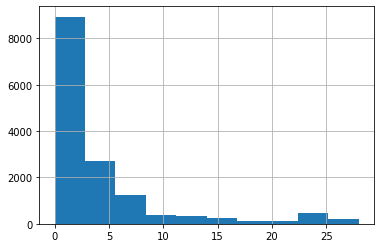

In [225]:
X.isna().sum(axis=1).hist()

In [226]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

X_encoded = X.apply(lambda col: pd.Series(
    LabelEncoder().fit_transform(col[col.notnull()]),
    index=col[col.notnull()].index
))

imputer = KNNImputer(n_neighbors=1)
X_imputed = imputer.fit_transform(X_encoded)
X_imputed.shape

(14772, 55)

In [227]:
pd.DataFrame(X_imputed, columns=X.columns).isna().sum().sum(), y.isna().sum()

(0, 0)

In [228]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_scaled.shape

(14772, 55)

<AxesSubplot:>

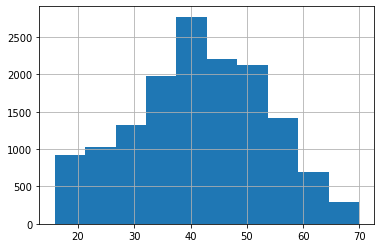

In [270]:
y.hist()

In [271]:
race_group.value_counts()

WHITE_ASIAN              10537
BLACK_HISPANIC_NATIVE     4235
Name: RACE_GROUP, dtype: int64

In [232]:
y_classification = np.where(y > y.median(), 1, 0)
y_classification[:100]

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [ ]:
# Size 3318(WA) 1695(BHN)

In [233]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [275]:
X_final = X_scaled.copy()
X_final = pd.DataFrame(X_final, columns=X.columns)
X_final.head()

,X1MTHID,X1MTHEFF,X1MTHINT,X1FAMINCOME,X1HHNUMBER,X1P1RELATION,X1PAR1EMP,X1PARRESP,X1SCHOOLBEL,X1STU30OCC2,S1M8GRADE,S1LANG1ST,S1TEPOPULAR,S1TEMAKEFUN,S1MTHCOMP,S1SCICOMP,S1APCALC,S1IBCALC,S1MTCHVALUES,S1MTCHINTRST,S1MTCHFAIR,S1MTCHRESPCT,S1MTCHCONF,S1MTCHEASY,X1PAR1EDU,X1PAR2EDU,X1PAR1OCC2,X1PAR2OCC2,P1REPEATGRD,P1ELLEVER,P1MARSTAT,P1YRBORN1,P1YRBORN2,P1JOBNOW1,P1JOBONET1_STEM1,P1JOBONET2_STEM1,P1HHTIME,P1EDUASPIRE,P1EDUEXPECT,P1MTHHWEFF,P1SCIHWEFF,P1ENGHWEFF,P1MTHCOMP,P1SCICOMP,P1ENGCOMP,P1MUSEUM,P1COMPUTER,P1FIXED,P1SCIFAIR,P1SCIPROJ,P1STEMDISC,P1NOACT,P1CAMPMS,P1CAMPOTH,P1NOOUTSCH
0,1.000000,0.961290,0.619718,0.750000,0.111111,0.142857,1.000000,1.0,0.963380,0.318182,0.0,0.0,0.666667,0.333333,0.50,0.5,0.000000,1.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.8,0.8,0.227273,0.409091,0.0,0.5,0.00,0.378378,0.297297,1.0,0.0,0.4,0.00,0.75,0.5,0.0,0.0,0.0,0.75,0.75,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.266667,0.877419,0.948357,0.166667,0.444444,0.000000,0.666667,1.0,0.808451,0.409091,0.2,0.2,1.000000,0.666667,0.75,0.5,0.333333,0.333333,0.333333,0.333333,0.000000,0.333333,0.000000,0.333333,0.4,0.2,0.727273,0.909091,0.0,0.5,0.00,0.567568,0.459459,1.0,0.0,0.0,0.00,0.50,0.5,0.5,0.5,0.5,1.00,0.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.266667,0.903226,0.854460,0.416667,0.111111,0.000000,1.000000,1.0,0.887324,0.318182,0.4,0.4,1.000000,1.000000,0.50,0.5,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.6,0.227273,0.318182,0.0,0.5,0.25,0.540541,0.378378,1.0,0.0,0.0,0.00,1.00,0.9,0.5,0.0,0.0,1.00,0.75,0.00,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.733333,0.748387,0.638498,0.333333,0.000000,0.857143,0.333333,1.0,0.788732,0.409091,0.0,0.0,0.666667,0.666667,0.50,0.5,0.666667,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.6,0.2,0.000000,0.818182,0.0,0.5,0.50,0.000000,0.081081,0.0,0.0,0.0,0.75,1.00,0.9,1.0,0.5,0.0,1.00,0.00,0.00,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.666667,0.748387,0.230047,0.666667,0.222222,0.000000,1.000000,1.0,0.214085,0.090909,0.2,0.2,0.000000,0.000000,0.50,0.5,0.000000,1.000000,0.666667,0.000000,0.666667,0.666667,0.666667,0.333333,0.6,0.6,0.590909,0.136364,0.0,0.5,0.25,0.567568,0.459459,1.0,0.0,0.2,0.00,1.00,0.9,0.0,0.0,0.0,0.50,0.50,0.50,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [280]:
X_final = X_scaled.copy()
X_final = pd.DataFrame(X_final, columns=X.columns)
X_final['RACE'] = race_group.values
X_final.shape

(14772, 56)

In [285]:
X_final.RACE.value_counts()

WHITE_ASIAN              10537
BLACK_HISPANIC_NATIVE     4235
Name: RACE, dtype: int64

In [286]:
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y_classification,
    test_size=0.3,
    random_state=random_state
)

print(X_train.shape, X_test.shape)

(10340, 56) (4432, 56)


In [292]:
X_train_race_group = X_train.loc[:, 'RACE']
X_train = X_train.drop(columns=['RACE'])
X_test_race_group = X_test.loc[:, 'RACE']
X_test = X_test.drop(columns=['RACE'])
print(X_train.shape, X_test.shape)

(10340, 55) (4432, 55)


In [293]:
clf = RandomForestClassifier(max_depth=16, min_samples_leaf=3, n_estimators=100, random_state=random_state)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_leaf=3, random_state=42)

In [294]:
evaluation_df = pd.concat([X_test, X_test_race_group], axis=1)
evaluation_df['y_test'] = y_test
evaluation_df['y_prediction'] = clf.predict(X_test)
evaluation_df.head()

,X1MTHID,X1MTHEFF,X1MTHINT,X1FAMINCOME,X1HHNUMBER,X1P1RELATION,X1PAR1EMP,X1PARRESP,X1SCHOOLBEL,X1STU30OCC2,S1M8GRADE,S1LANG1ST,S1TEPOPULAR,S1TEMAKEFUN,S1MTHCOMP,S1SCICOMP,S1APCALC,S1IBCALC,S1MTCHVALUES,S1MTCHINTRST,S1MTCHFAIR,S1MTCHRESPCT,S1MTCHCONF,S1MTCHEASY,X1PAR1EDU,X1PAR2EDU,X1PAR1OCC2,X1PAR2OCC2,P1REPEATGRD,P1ELLEVER,P1MARSTAT,P1YRBORN1,P1YRBORN2,P1JOBNOW1,P1JOBONET1_STEM1,P1JOBONET2_STEM1,P1HHTIME,P1EDUASPIRE,P1EDUEXPECT,P1MTHHWEFF,P1SCIHWEFF,P1ENGHWEFF,P1MTHCOMP,P1SCICOMP,P1ENGCOMP,P1MUSEUM,P1COMPUTER,P1FIXED,P1SCIFAIR,P1SCIPROJ,P1STEMDISC,P1NOACT,P1CAMPMS,P1CAMPOTH,P1NOOUTSCH,RACE,y_test,y_prediction
3615,0.733333,0.748387,0.929577,1.000000,0.333333,0.000000,1.000000,1.0,0.997183,0.727273,0.0,0.0,1.000000,1.000000,0.25,0.25,1.000000,1.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.0,0.000000,0.000000,0.0,0.5,0.00,0.567568,0.594595,1.0,0.0,0.0,0.0,0.75,0.5,0.0,0.0,0.0,0.75,1.0,0.50,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,WHITE_ASIAN,1,1
8141,0.733333,0.651613,0.638498,0.333333,0.555556,0.000000,0.666667,1.0,0.952113,0.954545,0.0,0.0,1.000000,0.666667,0.50,0.50,1.000000,1.000000,0.333333,0.000000,0.333333,0.333333,0.333333,0.333333,0.2,0.2,0.000000,0.000000,0.0,0.5,0.00,0.837838,0.783784,1.0,0.0,0.0,0.0,0.75,0.7,0.5,0.0,0.0,0.50,0.5,0.00,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,BLACK_HISPANIC_NATIVE,1,1
9001,0.533333,0.748387,0.929577,0.166667,0.111111,0.000000,0.333333,1.0,0.988732,0.954545,0.2,0.2,1.000000,1.000000,0.75,0.50,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.0,0.909091,0.590909,0.0,0.5,0.75,0.810811,0.783784,0.0,0.0,0.0,0.0,1.00,1.0,1.0,0.5,0.5,0.50,0.5,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WHITE_ASIAN,1,0
2417,0.866667,1.000000,0.751174,0.416667,0.111111,0.000000,0.666667,1.0,1.000000,0.409091,0.2,0.2,1.000000,1.000000,0.50,0.50,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.6,0.045455,0.818182,0.0,0.5,0.00,0.432432,0.432432,1.0,0.0,0.0,0.0,1.00,0.9,0.5,0.5,0.0,0.50,0.5,0.25,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,WHITE_ASIAN,1,1
9385,0.133333,0.122581,0.061033,0.416667,0.444444,0.857143,0.333333,1.0,0.822535,0.409091,1.0,1.0,0.666667,0.666667,0.25,0.25,0.333333,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.2,0.6,0.727273,0.136364,0.0,0.5,0.00,0.621622,0.540541,0.0,0.0,0.2,0.0,1.00,1.0,0.0,0.0,0.0,0.50,0.5,0.50,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,BLACK_HISPANIC_NATIVE,0,0


In [297]:
X_test_race_group.value_counts()

WHITE_ASIAN              3157
BLACK_HISPANIC_NATIVE    1275
Name: RACE, dtype: int64

In [298]:
y_true_wa, y_pred_wa = evaluation_df[evaluation_df.RACE == 'WHITE_ASIAN'][['y_test', 'y_prediction']].T.to_numpy()
y_true_bhn, y_pred_bhn = evaluation_df[evaluation_df.RACE == 'BLACK_HISPANIC_NATIVE'][['y_test', 'y_prediction']].T.to_numpy()    

In [304]:
def calculate_scores(test_df, class_name):
    y_true, y_pred = test_df[test_df.RACE == class_name][['y_test', 'y_prediction']].T.to_numpy()
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    NUM = (tp+fp+fn+tn)
    ACC = (tp+tn)/(tp+fp+fn+tn)
    FPR = fp/(fp+tn)
    FNR = fn/(tp+fn)
    PBR = (tp+fp)/(tp+fp+fn+tn)
    return {'class_name': class_name, 'SIZE': NUM, 'PBR': PBR, 'FPR': FPR, 'FNR': FNR, 'ACC': ACC}

In [307]:
class_names = ['WHITE_ASIAN', 'BLACK_HISPANIC_NATIVE']
results = []
for class_name in class_names:
    results.append(calculate_scores(evaluation_df, class_name))

confusion_matrix_by_class = pd.DataFrame(results, index=class_names)
confusion_matrix_by_class['random_state'] = random_state
confusion_matrix_by_class = confusion_matrix_by_class.T
confusion_matrix_by_class

,WHITE_ASIAN,BLACK_HISPANIC_NATIVE
class_name,WHITE_ASIAN,BLACK_HISPANIC_NATIVE
SIZE,3157,1275
PBR,0.558125,0.332549
FPR,0.285714,0.185407
FNR,0.232493,0.387244
ACC,0.744378,0.745098
random_state,42,42


In [343]:
%%time

class_names = ['WHITE_ASIAN', 'BLACK_HISPANIC_NATIVE']

seed_dataframes = []

for random_state in range(30):
    X_train, X_test, y_train, y_test = train_test_split(
        X_final,
        y_classification,
        test_size=0.3,
        random_state=random_state
    )
    X_train_race_group = X_train.loc[:, 'RACE']
    X_train = X_train.drop(columns=['RACE'])
    X_test_race_group = X_test.loc[:, 'RACE']
    X_test = X_test.drop(columns=['RACE'])
    clf = RandomForestClassifier(max_depth=16, min_samples_leaf=3, n_estimators=100, random_state=random_state)
    clf.fit(X_train, y_train)
    evaluation_df = pd.concat([X_test, X_test_race_group], axis=1)
    evaluation_df['y_test'] = y_test
    evaluation_df['y_prediction'] = clf.predict(X_test)
    for class_name in class_names:
        seed_dataframes.append(calculate_scores(evaluation_df, class_name))

CPU times: user 24.4 s, sys: 16.1 ms, total: 24.5 s
Wall time: 24.5 s


In [346]:
result = pd.DataFrame(seed_dataframes)
result.shape

(60, 6)

In [347]:
result.groupby('class_name').mean()

,SIZE,PBR,FPR,FNR,ACC
class_name,,,,,
BLACK_HISPANIC_NATIVE,1271.333333,0.318244,0.183785,0.419582,0.736140
WHITE_ASIAN,3160.666667,0.564485,0.302088,0.234161,0.736287


In [348]:
result.groupby('class_name').std()

,SIZE,PBR,FPR,FNR,ACC
class_name,,,,,
BLACK_HISPANIC_NATIVE,24.381074,0.011882,0.015111,0.019926,0.011425
WHITE_ASIAN,24.381074,0.009472,0.013479,0.011496,0.006439


# check

In [34]:
import pandas as pd
df = pd.read_pickle('../jeong2021math_dataframe.pickle')
df.shape

(14898, 53)

In [35]:
df.P1YRBORN2

0        11.0
1        17.0
2        17.0
3         7.0
4        26.0
5        30.0
6         5.0
7        17.0
8        25.0
9        20.0
10       16.0
11        9.0
12       14.0
13       25.0
14       14.0
15       17.0
16       20.0
17        9.0
18       18.0
19       20.0
20       17.0
21       16.0
22       20.0
23       15.0
24       21.0
25       27.0
26       21.0
27       20.0
28       12.0
29        7.0
30       18.0
31       18.0
32       24.0
33       14.0
34       26.0
35       24.0
36       18.0
37       18.0
38        7.0
39       25.0
40       31.0
41       20.0
42       18.0
43       11.0
44       22.0
45       17.0
46       22.0
47       17.0
48       17.0
49       37.0
50       29.0
51       17.0
52       11.0
53       25.0
54       12.0
55       24.0
56        8.0
57       17.0
58       16.0
59       21.0
60       17.0
61       22.0
62       21.0
63       14.0
64       13.0
65       22.0
66       30.0
67       33.0
68       18.0
69       10.0
70       20.0
71    

In [36]:
a = dict(df.apply(lambda x: len(x.unique())))
a

{'X1FAMINCOME': 13,
 'X1HHNUMBER': 10,
 'X1P1RELATION': 8,
 'X1PAR1EMP': 4,
 'X1PARRESP': 2,
 'X1STU30OCC2': 23,
 'S1M8GRADE': 6,
 'S1LANG1ST': 5,
 'S1TEPOPULAR': 4,
 'S1TEMAKEFUN': 4,
 'S1MTHCOMP': 5,
 'S1SCICOMP': 5,
 'S1APCALC': 4,
 'S1IBCALC': 4,
 'S1MTCHVALUES': 4,
 'S1MTCHINTRST': 4,
 'S1MTCHFAIR': 4,
 'S1MTCHRESPCT': 4,
 'S1MTCHCONF': 4,
 'S1MTCHEASY': 4,
 'X1PAR1EDU': 6,
 'X1PAR2EDU': 6,
 'X1PAR1OCC2': 24,
 'X1PAR2OCC2': 24,
 'P1REPEATGRD': 2,
 'P1ELLEVER': 3,
 'P1MARSTAT': 5,
 'P1YRBORN1': 38,
 'P1YRBORN2': 38,
 'P1JOBNOW1': 2,
 'P1JOBONET1_STEM1': 6,
 'P1JOBONET2_STEM1': 6,
 'P1HHTIME': 5,
 'P1EDUASPIRE': 5,
 'P1EDUEXPECT': 11,
 'P1MTHHWEFF': 3,
 'P1SCIHWEFF': 3,
 'P1ENGHWEFF': 3,
 'P1MTHCOMP': 5,
 'P1SCICOMP': 5,
 'P1ENGCOMP': 5,
 'P1MUSEUM': 2,
 'P1COMPUTER': 2,
 'P1FIXED': 2,
 'P1SCIFAIR': 2,
 'P1SCIPROJ': 2,
 'P1STEMDISC': 2,
 'P1NOACT': 2,
 'P1CAMPMS': 2,
 'P1CAMPOTH': 2,
 'P1NOOUTSCH': 2,
 'target': 2,
 'RACE_GROUP': 2}

In [37]:
str(a)

"{'X1FAMINCOME': 13, 'X1HHNUMBER': 10, 'X1P1RELATION': 8, 'X1PAR1EMP': 4, 'X1PARRESP': 2, 'X1STU30OCC2': 23, 'S1M8GRADE': 6, 'S1LANG1ST': 5, 'S1TEPOPULAR': 4, 'S1TEMAKEFUN': 4, 'S1MTHCOMP': 5, 'S1SCICOMP': 5, 'S1APCALC': 4, 'S1IBCALC': 4, 'S1MTCHVALUES': 4, 'S1MTCHINTRST': 4, 'S1MTCHFAIR': 4, 'S1MTCHRESPCT': 4, 'S1MTCHCONF': 4, 'S1MTCHEASY': 4, 'X1PAR1EDU': 6, 'X1PAR2EDU': 6, 'X1PAR1OCC2': 24, 'X1PAR2OCC2': 24, 'P1REPEATGRD': 2, 'P1ELLEVER': 3, 'P1MARSTAT': 5, 'P1YRBORN1': 38, 'P1YRBORN2': 38, 'P1JOBNOW1': 2, 'P1JOBONET1_STEM1': 6, 'P1JOBONET2_STEM1': 6, 'P1HHTIME': 5, 'P1EDUASPIRE': 5, 'P1EDUEXPECT': 11, 'P1MTHHWEFF': 3, 'P1SCIHWEFF': 3, 'P1ENGHWEFF': 3, 'P1MTHCOMP': 5, 'P1SCICOMP': 5, 'P1ENGCOMP': 5, 'P1MUSEUM': 2, 'P1COMPUTER': 2, 'P1FIXED': 2, 'P1SCIFAIR': 2, 'P1SCIPROJ': 2, 'P1STEMDISC': 2, 'P1NOACT': 2, 'P1CAMPMS': 2, 'P1CAMPOTH': 2, 'P1NOOUTSCH': 2, 'target': 2, 'RACE_GROUP': 2}"